In [1]:
import json

input_file = "homepage_data_analyzed_multiple_joined_15.json"
data = json.load(open(input_file, "r"))


In [6]:
import matplotlib.pyplot as plt
import numpy as np

people = data["general_analysis_gpt-4o_0_0"].keys()
people

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [9]:
hong_kong_emphasis_scores_columns = [key for key in data.keys() if key.startswith("hong_kong_emphasis_score")]
for column in hong_kong_emphasis_scores_columns:
    scores = data[column]
    inverse_scores = {}
    for person in scores:
        inverse_scores[person] = 10 - scores[person] if scores[person] else None
    data["inverse_" + column] = inverse_scores

In [12]:
data.keys()

dict_keys(['general_analysis_gpt-4o_0_0', 'cross_group_thinking_ideas_analysis_gpt-4o_0_0', 'cross_group_thinking_score_gpt-4o_0_0', 'unifying_language_ideas_analysis_gpt-4o_0_0', 'unifying_language_score_gpt-4o_0_0', 'shared_initiatives_outreach_ideas_analysis_gpt-4o_0_0', 'shared_initiatives_outreach_score_gpt-4o_0_0', 'importance_of_career_standing_ideas_analysis_gpt-4o_0_0', 'importance_of_career_standing_score_gpt-4o_0_0', 'hong_kong_emphasis_ideas_analysis_gpt-4o_0_0', 'hong_kong_emphasis_score_gpt-4o_0_0', 'highlighting_china_organization_ideas_analysis_gpt-4o_0_0', 'highlighting_china_organization_score_gpt-4o_0_0', 'general_analysis_gpt-4o_1_0', 'cross_group_thinking_ideas_analysis_gpt-4o_1_0', 'cross_group_thinking_score_gpt-4o_1_0', 'unifying_language_ideas_analysis_gpt-4o_1_0', 'unifying_language_score_gpt-4o_1_0', 'shared_initiatives_outreach_ideas_analysis_gpt-4o_1_0', 'shared_initiatives_outreach_score_gpt-4o_1_0', 'importance_of_career_standing_ideas_analysis_gpt-4o_1_0

In [15]:
score_columns = {
    "camouflage": ['importance_of_career_standing_score', 'inverse_hong_kong_emphasis_score', 'highlighting_china_organization_score'],
    "reconciliation": ['cross_group_thinking_score', 'unifying_language_score', 'shared_initiatives_outreach_score']
}

In [22]:
all_score_columns = {"camouflage": [], "reconciliation": []}
for key in score_columns:
    for column in score_columns[key]:
        for real_column in data.keys():
            if real_column.startswith(column):
                all_score_columns[key].append(real_column)

In [23]:
import pandas as pd
author_stats = pd.DataFrame(index=people)
for category in all_score_columns:
    for column in all_score_columns[category]:
        scores_series = pd.Series(data[column])
        author_stats[column] = scores_series

In [24]:
author_stats["total_camouflage_score"] = np.mean(author_stats[all_score_columns["camouflage"]], axis=1)
author_stats["total_reconciliation_score"] = np.mean(author_stats[all_score_columns["reconciliation"]], axis=1)

In [25]:
# Clean the data by removing rows with NaN values
author_stats = author_stats.dropna()

# Display summary statistics
print(f"Total authors with complete data: {len(author_stats)}")
print("\nCamouflage Score Summary:")
print(author_stats["total_camouflage_score"].describe())
print("\nReconciliation Score Summary:")
print(author_stats["total_reconciliation_score"].describe())

Total authors with complete data: 151

Camouflage Score Summary:
count    151.000000
mean       6.471376
std        0.833787
min        3.688889
25%        5.911111
50%        6.377778
75%        6.977778
max        9.244444
Name: total_camouflage_score, dtype: float64

Reconciliation Score Summary:
count    151.000000
mean       4.108462
std        1.650238
min        1.577778
25%        2.800000
50%        3.800000
75%        5.255556
max        8.733333
Name: total_reconciliation_score, dtype: float64


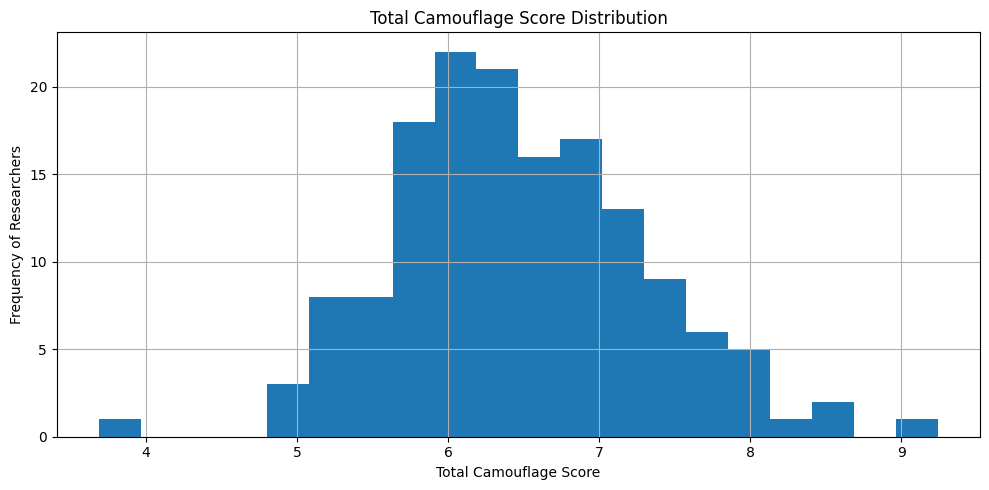

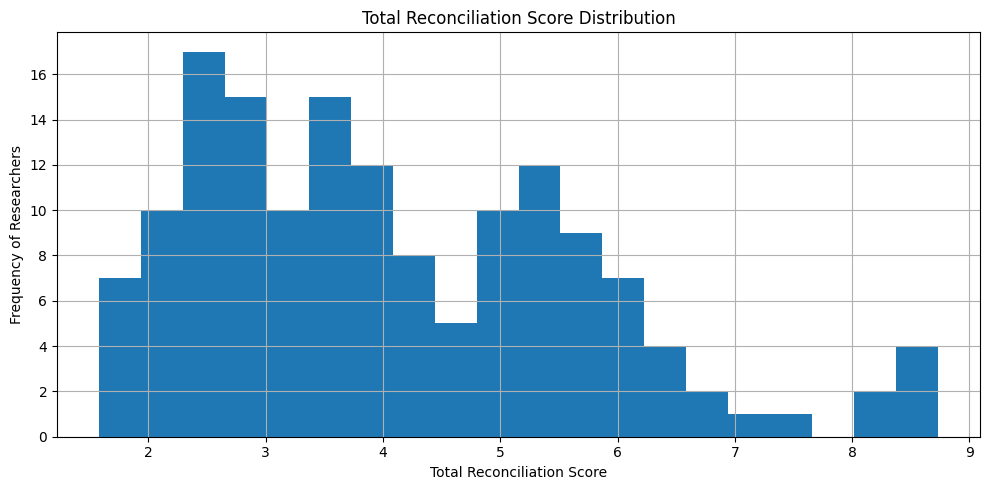

In [27]:
import matplotlib.pyplot as plt

# Plot the Total Camouflage Score Distribution
plt.figure(figsize=(10, 5))
plt.title("Total Camouflage Score Distribution")
plt.xlabel("Total Camouflage Score")
plt.ylabel("Frequency of Researchers")
author_stats["total_camouflage_score"][author_stats["total_camouflage_score"] > 0].hist(bins=20)
plt.tight_layout()  # Adjust layout after adding title and labels
plt.show()

# Plot the Total Reconciliation Score Distribution
plt.figure(figsize=(10, 5))
plt.title("Total Reconciliation Score Distribution")
plt.xlabel("Total Reconciliation Score")
plt.ylabel("Frequency of Researchers")
author_stats["total_reconciliation_score"][author_stats["total_reconciliation_score"] > 0].hist(bins=20)
plt.tight_layout()  # Adjust layout after adding title and labels
plt.show()